In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
iris_dt = pd.read_csv('./data/iris_with_header.csv')
iris_dt

FileNotFoundError: [Errno 2] No such file or directory: './data/iris_with_header.csv'

In [34]:
iris_dt.shape

(150, 5)

In [35]:
iris_dummies=pd.get_dummies(iris_dt,columns=['species'],dtype=int)
iris_dummies

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [36]:
iris_dum=iris_dummies[['sepal_length','sepal_width','petal_length','species_setosa','species_versicolor','species_virginica']]
iris_dum

,sepal_length,sepal_width,petal_length,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,1,0,0
1,4.9,3.0,1.4,1,0,0
2,4.7,3.2,1.3,1,0,0
3,4.6,3.1,1.5,1,0,0
4,5.0,3.6,1.4,1,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,0,0,1
146,6.3,2.5,5.0,0,0,1
147,6.5,3.0,5.2,0,0,1
148,6.2,3.4,5.4,0,0,1


In [37]:
X=iris_dum[['sepal_length','sepal_width','petal_length']]
X

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


In [38]:
y=iris_dum[['species_setosa','species_versicolor','species_virginica']]
y

,species_setosa,species_versicolor,species_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [39]:
X = X.values
y = y.values


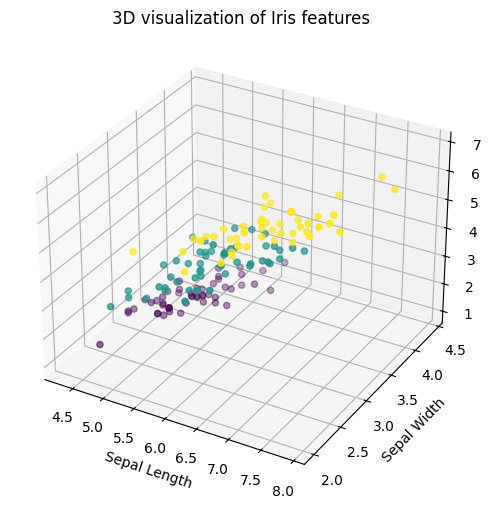

In [41]:
from mpl_toolkits.mplot3d import Axes3D




fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# If y is one-hot encoded:
labels = y.argmax(axis=1)

ax.scatter(X[:,0], X[:,1], X[:,2], c=labels, cmap='viridis')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title('3D visualization of Iris features')
plt.show()

In [58]:
X_mean=np.mean(X)
X_n=X-X_mean
X_std=np.std(X)
X_norm=X_n/X_std
X_norm.shape

(150, 3)

In [96]:
X_norm=X_norm.T
X_norm.shape

(3, 150)

In [92]:
y=y.T
y.shape

(3, 150)

In [97]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [98]:
def tanh(z):
    return np.tanh(z)

In [102]:
def initpara(X,y,hl1,hl2,hl3):
    n_x=X.shape[0]
    n_y=y.shape[0]
    w1=np.random.rand(hl1,n_x)
    b1=np.random.rand(hl1,1)
    w2=np.random.rand(hl2,hl1)
    b2=np.random.rand(hl2,1)
    w3=np.random.rand(hl3,hl2)
    b3=np.random.rand(hl3,1)
    w4=np.random.rand(n_y,hl3)
    b4=np.random.rand(n_y,1)
    return w1,b1,w2,b2,w3,b3,w4,b4

In [105]:
params=initpara(X_norm,y,3,4,3)
w1,b1,w2,b2,w3,b3,w4,b4=params

In [106]:
w1.shape

(3, 3)

In [107]:
b1.shape

(3, 1)

In [108]:
w2.shape

(4, 3)

In [109]:
b2.shape

(4, 1)

In [110]:
w3.shape

(3, 4)

In [111]:
b3.shape

(3, 1)

In [112]:
w4.shape

(3, 3)

In [113]:
b4.shape

(3, 1)

In [127]:
def forw_propa(X,y,params):
    w1=params[0]
    b1=params[1]
    w2=params[2]
    b2=params[3]
    w3=params[4]
    b3=params[5]
    w4=params[6]
    b4=params[7]

    Z1=w1.dot(X)+b1
    A1=tanh(Z1)
    Z2=w2.dot(A1)+b2
    A2=tanh(Z2)
    Z3=w3.dot(A2)+b3
    A3=tanh(Z3)
    Z4=w4.dot(A3)+b4
    A4=sigmoid(Z4)

    epsilon = 1e-15  # Small value to prevent log(0)
    # Clip predictions to avoid 0 and 1
    A4 = np.clip(A4, epsilon, 1 - epsilon)

    return Z1,A1,Z2,A2,Z3,A3,Z4,A4
    

In [128]:
cache=forw_propa(X_norm,y,params)
Z1,A1,Z2,A2,Z3,A3,Z4,A4=cache

In [129]:
Z1.shape

(3, 150)

In [130]:
A1.shape

(3, 150)

In [131]:
Z2.shape

(4, 150)

In [132]:
A2.shape

(4, 150)

In [133]:
Z3.shape

(3, 150)

In [134]:
A3.shape

(3, 150)

In [135]:
Z4.shape

(3, 150)

In [136]:
A4.shape

(3, 150)

In [137]:
def costfunc(y,A4):
    m=y.shape[1]
    
    cost=-(1/m)*np.sum(y*np.log(A4)+(1-y)*np.log(1-A4))
    return cost

In [147]:
def back_propa(X,y,params,cache):

    m=y.shape[1]
    
    w1=params[0]
    b1=params[1]
    w2=params[2]
    b2=params[3]
    w3=params[4]
    b3=params[5]
    w4=params[6]
    b4=params[7]

    Z1=cache[0]
    A1=cache[1]
    Z2=cache[2]
    A2=cache[3]
    Z3=cache[4]
    A3=cache[5]
    Z4=cache[6]
    A4=cache[7]

    dZ4= A4 - y
    dw4=(1/m)*(dZ4.dot(A3.T))
    db4=(1/m)*np.sum(dZ4)

    dZ3= w4.T.dot(dZ4)*(1-A3**2)
    dw3=(1/m)*(dZ3.dot(A2.T))
    db3=(1/m)*np.sum(dZ3)

    dZ2= w3.T.dot(dZ3)*(1-A2**2)
    dw2=(1/m)*(dZ2.dot(A1.T))
    db2=(1/m)*np.sum(dZ2)

    dZ1= w2.T.dot(dZ2)*(1-A1**2)
    dw1=(1/m)*(dZ1.dot(X.T))
    db1=(1/m)*np.sum(dZ1)

    return dw4,db4,dw3,db3,dw2,db2,dw1,db1
    

In [148]:
grads=back_propa(X_norm,y,params,cache)
dw4,db4,dw3,db3,dw2,db2,dw1,db1=grads

In [149]:
dw4.shape

(3, 3)

In [150]:
db4.shape

()

In [151]:
dw3.shape

(3, 4)

In [152]:
db3.shape

()

In [153]:
dw2.shape

(4, 3)

In [154]:
db2.shape

()

In [155]:
dw1.shape

(3, 3)

In [156]:
db1.shape

()

In [182]:
def update(grads,params,learn_r):
    w1=params[0]
    b1=params[1]
    w2=params[2]
    b2=params[3]
    w3=params[4]
    b3=params[5]
    w4=params[6]
    b4=params[7]

    dw4=grads[0]
    db4=grads[1]
    dw3=grads[2]
    db3=grads[3]
    dw2=grads[4]
    db2=grads[5]
    dw1=grads[6]
    db1=grads[7]

    w1=w1-(learn_r*dw1)
    b1=b1-(learn_r*db1)
    w2=w2-(learn_r*dw2)
    b2=b2-(learn_r*db2)
    w3=w3-(learn_r*dw3)
    b3=b3-(learn_r*db3)
    w4=w4-(learn_r*dw4)
    b4=b4-(learn_r*db4)

    return w1,b1,w2,b2,w3,b3,w4,b4

In [185]:
params=update(grads,params,0.8)

In [186]:
w1.shape

(3, 3)

In [187]:
b1.shape

(3, 1)

In [188]:
w2.shape

(4, 3)

In [189]:
b2.shape

(4, 1)

In [190]:
w3.shape

(3, 4)

In [191]:
b3.shape

(3, 1)

In [192]:
w4.shape

(3, 3)

In [193]:
b4.shape

(3, 1)

In [194]:
def get_predictions(A4):
    pred = np.zeros_like(A4)
    pred[np.argmax(A4, axis=0), np.arange(A4.shape[1])] = 1
    return pred

In [263]:
pred=get_predictions(A4)
pred

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.,

In [195]:
def get_accuracy(y_predicted, y):
    #print(y_predicted, y)
    return np.sum(y_predicted == y) / y.size

In [196]:
def train(X,y,hl1,hl2,hl3,epoch,learn_r):
    params=initpara(X_norm,y,3,4,3)
    cost_history=[]
    n_print=epoch//20
    for i in range(epoch):
        cache=forw_propa(X_norm,y,params)
        A4=cache[7]
        cost=costfunc(y,A4)
        grads=back_propa(X_norm,y,params,cache)
        params=update(grads,params,learn_r)
        cost_history.append(cost)
        
        if (i+1) % n_print == 0:
            predictions = get_predictions(A4)
            accu = get_accuracy(predictions, y)
            
            print("Iteration", i+1, " | Cost: ", cost, " | Accuracy: ", accu,"\n")


    w1=params[0]
    b1=params[1]
    w2=params[2]
    b2=params[3]
    w3=params[4]
    b3=params[5]
    w4=params[6]
    b4=params[7]

    return w1,b1,w2,b2,w3,b3,w4,b4,cost_history
            


In [208]:
w1,b1,w2,b2,w3,b3,w4,b4,cost_history=train(X_norm,y,hl1=3,hl2=4,hl3=3,epoch=1500000,learn_r=0.8)

Iteration 75000  | Cost:  0.11176929174314844  | Accuracy:  0.9822222222222222 

Iteration 150000  | Cost:  0.11170147182881619  | Accuracy:  0.9822222222222222 

Iteration 225000  | Cost:  0.11169174731157666  | Accuracy:  0.9822222222222222 

Iteration 300000  | Cost:  0.11168762179627309  | Accuracy:  0.9822222222222222 

Iteration 375000  | Cost:  0.11168532146084455  | Accuracy:  0.9822222222222222 

Iteration 450000  | Cost:  0.1116838504540073  | Accuracy:  0.9822222222222222 

Iteration 525000  | Cost:  0.11168282710207829  | Accuracy:  0.9822222222222222 

Iteration 600000  | Cost:  0.11168207283538725  | Accuracy:  0.9822222222222222 

Iteration 675000  | Cost:  0.11168149260116036  | Accuracy:  0.9822222222222222 

Iteration 750000  | Cost:  0.11168103075211973  | Accuracy:  0.9822222222222222 

Iteration 825000  | Cost:  0.1116806517918223  | Accuracy:  0.9822222222222222 

Iteration 900000  | Cost:  0.1116803301724403  | Accuracy:  0.9822222222222222 

Iteration 975000  | 

In [209]:
w1

array([[  5.11387958,  -9.11019667,  -0.58444763],
       [ -6.75101826,  -4.81192871,  23.95416496],
       [ -9.59804042, -17.33699749,   7.7740332 ]])

In [210]:
b1

array([[-0.40320103],
       [-0.70070157],
       [-0.47837911]])

In [211]:
w2

array([[  8.17179441,   4.32159092,   1.51649407],
       [  4.36233345,   2.18177814,   0.3053616 ],
       [  1.07333019,  -9.5745729 ,   2.32879661],
       [ 14.23789807,  -6.19382093, -16.07767882]])

In [212]:
b2

array([[15.03348726],
       [15.6635329 ],
       [15.13631444],
       [14.95434567]])

In [213]:
w3

array([[ 5.37719392,  5.98993575,  4.90033468,  6.12402652],
       [ 2.35247308,  1.15510631,  4.55904539,  2.12181775],
       [ 4.84018794,  3.20866446,  0.23580917, -1.26666113]])

In [214]:
b3

array([[0.0603226 ],
       [0.27046959],
       [0.93304604]])

In [215]:
w4

array([[ 3.3681935 ,  4.536302  , -5.39812321],
       [-6.09633364,  0.63728314,  8.21893066],
       [12.94871912, -3.82167397, -5.68207398]])

In [216]:
b4

array([[-3.1995208 ],
       [-3.4530253 ],
       [-4.13811977]])

Text(0, 0.5, 'Cost_value')

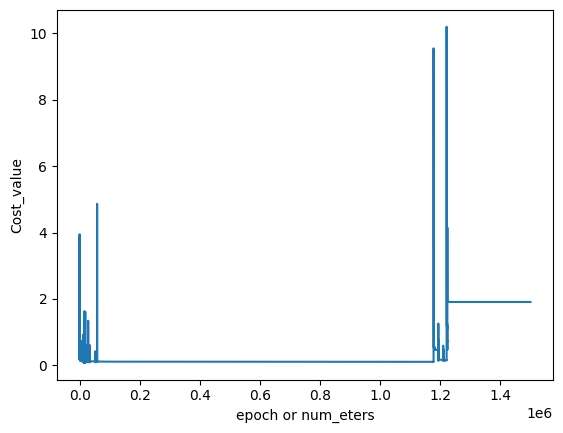

In [217]:
plt.plot(cost_history)
plt.xlabel('epoch or num_eters')
plt.ylabel('Cost_value')

3D contour not supported on some matplotlib versions: Input z must be 2D, not 3D


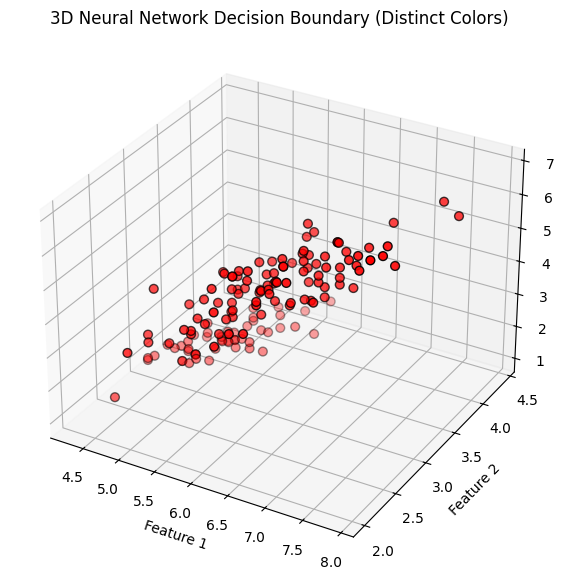

In [232]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Define distinct class colors (red, green, blue)
distinct_cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Normalize your data using the same mean and std as in training
X_norm = (X - X_mean) / X_std

# 1️⃣ Define the 3D grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1

xx, yy, zz = np.meshgrid(
    np.arange(x_min, x_max, 0.2),
    np.arange(y_min, y_max, 0.2),
    np.arange(z_min, z_max, 0.2)
)

# 2️⃣ Flatten the grid points into (n_points, 3)
grid_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
grid_norm = (grid_points - X_mean) / X_std

# 3️⃣ Run forward propagation on the grid
cache = forw_propa(grid_norm.T, y.T, params)
A_last = cache[-1]  # final layer output (softmax probabilities)
Z = get_predictions(A_last)

# 4️⃣ Reshape predictions to the grid
Z = np.argmax(A_last, axis=0)  # shape: (n_points,)
Z = Z.reshape(xx.shape)  

# 5️⃣ Plot the 3D scatter and isosurface decision boundaries
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter actual data (colored by predicted labels)
y_pred = np.argmax(forw_propa(X_norm.T, y.T, params)[-1], axis=0)
ax.scatter(X[:,0], X[:,1], X[:,2], c=y_pred, cmap=distinct_cmap, s=40, edgecolors='k')

# 3D contour (optional)
try:
    ax.contourf(xx, yy, zz, Z, alpha=0.2, cmap=distinct_cmap)
except Exception as e:
    print("3D contour not supported on some matplotlib versions:", e)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Neural Network Decision Boundary (Distinct Colors)')

plt.show()


In [255]:
import plotly.io as pio
pio.renderers.default = 'notebook'  # use inline notebook renderer
print("Renderer set to:", pio.renderers.default)

Renderer set to: notebook


In [260]:
import numpy as np
import plotly.graph_objects as go

# === 1. Create the 3D grid ===
x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
z_min, z_max = X[:,2].min()-0.5, X[:,2].max()+0.5

xx, yy, zz = np.meshgrid(
    np.linspace(x_min, x_max, 25),
    np.linspace(y_min, y_max, 25),
    np.linspace(z_min, z_max, 25)
)

# === 2. Prepare normalized grid for NN ===
grid = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
grid_norm = (grid - np.mean(X, axis=0)) / np.std(X, axis=0)

# === 3. Get network predictions ===
A_last = forw_propa(grid_norm.T, y.T, params)[-1]   # forward pass
Z = np.argmax(A_last, axis=0)                       # predicted class
Z = Z.reshape(xx.shape)

# === 4. Plot predicted regions as scatter cloud ===
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=grid[:,0], y=grid[:,1], z=grid[:,2],
    mode='markers',
    marker=dict(
        size=2,
        color=Z.flatten(),
        colorscale='Viridis',
        opacity=1
    ),
    name='Decision regions'
))

# === 5. Add real data points ===
fig.add_trace(go.Scatter3d(
    x=X[:,0], y=X[:,1], z=X[:,2],
    mode='markers',
    marker=dict(
        size=5,
        color=np.argmax(y, axis=1),
        colorscale='Viridis',
        symbol='circle'
    ),
    name='True data'
))

# === 6. Final layout ===
fig.update_layout(
    scene=dict(
        xaxis_title='Sepal length',
        yaxis_title='Sepal width',
        zaxis_title='Petal length'
    ),
    title='3D Neural Network Decision Regions',
    width=900, height=700
)
# === 4. Plot predicted regions as scatter cloud ===
print("Code reached plotting stage. The plot should appear now.") # <--- Add this
fig = go.Figure()
# ... rest of the code
fig.show()
A_last_real = forw_propa(X.T, y.T, params)[-1]
y_pred_classes = np.argmax(A_last_real, axis=0)
print("Unique predictions on real data:", np.unique(y_pred_classes))


Code reached plotting stage. The plot should appear now.


Unique predictions on real data: [0]


In [234]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 2.4 MB/s eta 0:00:04
   ------ --------------------------------- 1.6/9.8 MB 4.2 MB/s eta 0:00:02
   ------------- -------------------------- 3.4/9.8 MB 5.3 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.8 MB 6.8 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.8 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Program Files\Python312\python.exe -m pip install --upgrade pip
